# Gemini model for image understanding and build RAG with LlamaIndex

- https://github.com/run-llama/llama_index/blob/main/docs/examples/multi_modal/gemini.ipynb

In [1]:
import requests
from pathlib import Path

# Google용 AI 키 세팅
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_AI_KEY = os.environ.get('GOOGLE_AI_KEY')
# print(GOOGLE_AI_KEY)

os.environ["GOOGLE_API_KEY"] = GOOGLE_AI_KEY

In [2]:
# # [참고] 인터넷 / GitHub Public Repository에 있는 사진 다운받기 
# image_address = "https://github.com/kongju7/img/blob/main/location.jpg?raw=true" # public repo

# import requests
# from pathlib import Path

# # 데이터 폴더 설정 
# data_path = Path("imgs/")
# data_path.mkdir(exist_ok=True)

# # 이미지 경로 설정 
# custom_image_path = data_path / "location1.jpg"

# # 이미지가 없다면 다운 
# if not custom_image_path.is_file():
#     with open(custom_image_path, "wb") as f:
#         request = requests.get(image_address) 
#         print(f"{custom_image_path} 를 다운받는 중입니다...")
#         f.write(request.content)
# else:
#     print(f"{custom_image_path} 는 이미 존재합니다. 다운로드는 생략하였습니다.")
    
# # 이미지 출력
# from IPython.display import Image, display

# display(Image(custom_image_path))

In [3]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)

image_urls = [
    "https://github.com/kongju7/img/blob/main/location.jpg?raw=true", # public repo
    "https://storage.googleapis.com/generativeai-downloads/data/scene.jpg", 
]

image_documents = load_image_urls(image_urls)

gemini_pro = GeminiMultiModal(model="models/gemini-pro")

https://github.com/kongju7/img/blob/main/location.jpg?raw=true


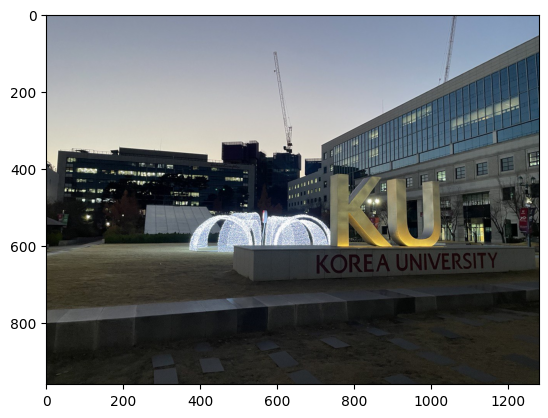

In [4]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [5]:
complete_response = gemini_pro.complete(
    prompt="이 사진이 찍힌 도시가 어디인지 알려줘.",
    image_documents=image_documents,
)

print(complete_response)

 서울특별시입니다.


In [6]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="이 사진에 대한 추가적인 정보를 알려줘.",
    image_documents=image_documents,
)

for r in stream_complete_response:
    print(r.text, end="") 

# 오류

 위의 사진은 한국대학교의 캠퍼스 풍경입니다. 아래의 사진은 뉴욕의 한 골목길 풍경입니다.

- Async Complete

In [7]:
response_acomplete = await gemini_pro.acomplete(
    prompt="이 사진들에 대해서 다른 표현으로 묘사해줘",
    image_documents=image_documents,
)

In [8]:
print(response_acomplete)

 첫 번째 사진은 한국대학교의 야외 캠퍼스에 있는 조명 조각품입니다. 조각품은 빛나는 아치형 구조물로, 밤에 아름답게 빛납니다. 조각품은 캠퍼스의 중앙에 위치하고 있으며, 학생들이 휴식을 취하거나 공부하는 인기 있는 장소입니다.

두 번째 사진은 뉴욕시의 한 골목길입니다. 골목길은 좁고 어둡고, 양쪽에는 오래된 건물들이 늘어서 있습니다. 골목길의 한쪽에는 'One Way' 표지판이 보이고, 다른 쪽에는 소화전이 보입니다. 골목길은 사람들이 지나다니는 데 사용되지만, 차량은 통행할 수 없습니다.


- Async Steam Complete

In [9]:
response_astream_complete = await gemini_pro.astream_complete(
    prompt="이 사진에 대한 추가적인 정보를 알려줘",
    image_documents=image_documents,
)

In [10]:
async for delta in response_astream_complete:
    print(delta.text, end="")
    
# 오류 

 첫 번째 사진은 한국대학교의 야경입니다. 두 번째 사진은 뉴욕의 좁은 골목길입니다.

- Complete with Two images

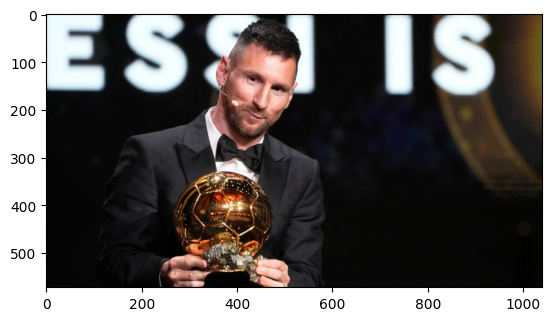

In [11]:
image_urls = [
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

img_response1 = requests.get(image_urls[0])
img_response2 = requests.get(image_urls[1])
img1 = Image.open(BytesIO(img_response1.content))
plt.imshow(img1)

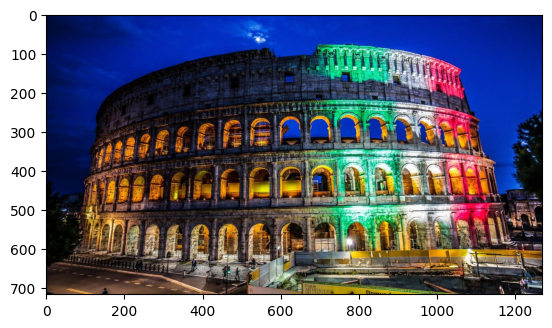

In [12]:

img2 = Image.open(BytesIO(img_response2.content))
plt.imshow(img2)

In [13]:

image_documents_1 = load_image_urls(image_urls)

response_multi = gemini_pro.complete(
    prompt="이 이미지들 사이에 어떤 관계가 있어?",
    image_documents=image_documents_1,
)
print(response_multi)

 이미지 1: 축구 선수 리오넬 메시가 발롱도르를 수상했습니다.
이미지 2: 이탈리아의 국기색으로 빛나는 로마의 콜로세움 원형 경기장.

이미지 1과 이미지 2는 관련이 없습니다.


## Part2: `Gemini` + `Pydantic` for Structured Output Parsing from an Image

In [14]:

import google.generativeai as genai

genai.configure(
    api_key=GOOGLE_AI_KEY,
    client_options={"api_endpoint": "generativelanguage.googleapis.com"},
)

In [15]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [16]:
# 구글 맵 이미지 다운받기 
image_address_lists = [("https://docs.google.com/uc?export=download&id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg", "miami.png"),
                        ("https://docs.google.com/uc?export=download&id=1dYZy17bD6pSsEyACXx9fRMNx93ok-kTJ", "orlando.png"),
                        ("https://docs.google.com/uc?export=download&id=1ShPnYVc1iL_TA1t7ErCFEAHT74-qvMrn", "sf.png"),
                        ("https://docs.google.com/uc?export=download&id=1WjISWnatHjwL4z5VD_9o09ORWhRJuYqm", "toronto.png")]

In [17]:
import requests
from pathlib import Path

# 데이터 폴더 설정 
data_path = Path("google_restaurants/")
data_path.mkdir(exist_ok=True)

for img in image_address_lists: 
    image_address, image_name = img 
    custom_image_path = data_path / image_name
    
        # 이미지가 없다면 다운 
    if not custom_image_path.is_file():
        with open(custom_image_path, "wb") as f:
            request = requests.get(image_address) 
            print(f"{custom_image_path} 를 다운받는 중입니다...")
            f.write(request.content)
    else:
        print(f"{custom_image_path} 는 이미 존재합니다. 다운로드는 생략하였습니다.")

google_restaurants\miami.png 는 이미 존재합니다. 다운로드는 생략하였습니다.
google_restaurants\orlando.png 는 이미 존재합니다. 다운로드는 생략하였습니다.
google_restaurants\sf.png 는 이미 존재합니다. 다운로드는 생략하였습니다.
google_restaurants\toronto.png 는 이미 존재합니다. 다운로드는 생략하였습니다.


- Define the Pydantic Class for the Structured Parser

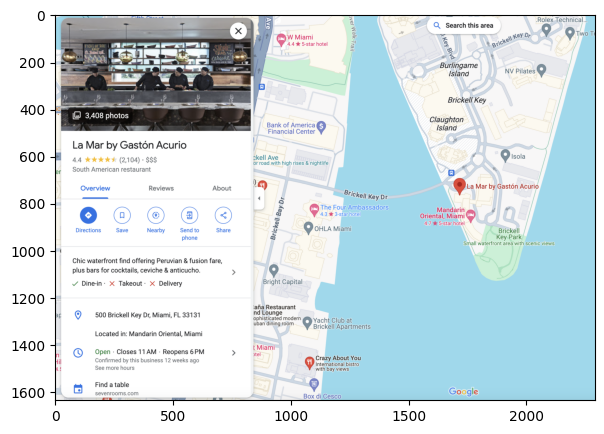

In [18]:
from pydantic import BaseModel
from PIL import Image
import matplotlib.pyplot as plt


class GoogleRestaurant(BaseModel):
    """Data model for a Google Restaurant."""

    restaurant: str
    food: str
    location: str
    category: str
    hours: str
    price: float
    rating: float 
    review: str
    description: str
    nearby_tourist_places: str


google_image_path = "./google_restaurants/miami.png"
image = Image.open(google_image_path).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

- Call the Pydantic Program and Generate Structured Output

In [19]:
from llama_index.multi_modal_llms import GeminiMultiModal
from llama_index.program import MultiModalLLMCompletionProgram
from llama_index.output_parsers import PydanticOutputParser

prompt_template_str = """\
    이 이미지 안에 무엇이 있는지 요약해서 json 형태로 답변을 반환해줘\
"""


def pydantic_gemini(
    model_name, output_class, image_documents, prompt_template_str
):
    gemini_llm = GeminiMultiModal(
        api_key=GOOGLE_AI_KEY, model_name=model_name
    )

    llm_program = MultiModalLLMCompletionProgram.from_defaults(
        output_parser=PydanticOutputParser(output_class),
        image_documents=image_documents,
        prompt_template_str=prompt_template_str,
        multi_modal_llm=gemini_llm,
        verbose=True,
    )

    response = llm_program()
    return response

- Generate the Pydantic Structured Output via Gemini Vision Model

In [20]:

from llama_index import SimpleDirectoryReader

google_image_documents = SimpleDirectoryReader(
    "./google_restaurants"
).load_data()

results = []
for img_doc in google_image_documents:
    pydantic_response = pydantic_gemini(
        "models/gemini-pro-vision",
        GoogleRestaurant,
        [img_doc],
        prompt_template_str,
    )
    # only output the results for miami for example along with image
    if "miami" in img_doc.image_path:
        for r in pydantic_response:
            # print("miami 이미지에 대한 결과 출력")
            print(r)
    results.append(pydantic_response)

('restaurant', 'La Mar by Gaston Acurio')
('food', 'South American')
('location', '500 Brickell Key Dr, Miami, FL 33131')
('category', 'Restaurant')
('hours', 'Closes at 11 PM')
('price', 3.0)
('rating', 4.4)
('review', '4.4 out of 5 stars from 2,104 reviews')
('description', 'Chic waterfront find offering Peruvian & fusion fare, plus bars for cocktails, ceviche & anticucho.')
('nearby_tourist_places', 'Brickell Key Park')


## Part3: Build Multi-Modal RAG for Restaurant Recommendation

- Construct Text Nodes for Building Vector Store. Store metadata and description for each restaurant

In [21]:
from llama_index.schema import TextNode

nodes = []
for res in results:
    text_node = TextNode()
    metadata = {}
    for r in res:
        # set description as text of TextNode
        if r[0] == "description":
            text_node.text = r[1]
        else:
            metadata[r[0]] = r[1]
    text_node.metadata = metadata
    nodes.append(text_node)

In [22]:
nodes[0]

TextNode(id_='c0226261-8ca8-418c-8154-76671179f613', embedding=None, metadata={'restaurant': 'La Mar by Gaston Acurio', 'food': 'South American', 'location': '500 Brickell Key Dr, Miami, FL 33131', 'category': 'Restaurant', 'hours': 'Closes at 11 PM', 'price': 3.0, 'rating': 4.4, 'review': '4.4 out of 5 stars from 2,104 reviews', 'nearby_tourist_places': 'Brickell Key Park'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e8310c060f61caaff8a', text='Chic waterfront find offering Peruvian & fusion fare, plus bars for cocktails, ceviche & anticucho.', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')

- Using Gemini Embedding for building Vector Store for Dense retrieval. Index Restaurants as nodes into Vector Store

In [23]:
# !pip install --upgrade llama-index

- `!pip install --upgrade llama-index` 먼저 실행!   
(2023/12/15 현재 llama-index 0.9.15에는 `GeminiEmbedding` 없음!)  
      
- 그 후에도 `ImportError: cannot import name 'GeminiEmbedding' from 'llama_index.embeddings'`라는 오류가 뜬다면 
- `https://github.com/run-llama/llama_index`을 다운받아서 `llama_index` 폴더를 로컬 `site-packages` 폴더 안에 있는  `llama_index` 폴더에 통째로 붙여넣기 해 주세요! 

In [24]:
from llama_index import VectorStoreIndex, StorageContext, ServiceContext
from llama_index.embeddings import GeminiEmbedding
from llama_index.llms import Gemini
from llama_index.vector_stores import QdrantVectorStore
from llama_index import StorageContext
import qdrant_client


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_gemini_3")

vector_store = QdrantVectorStore(client=client, collection_name="collection")

# Using the embedding model to Gemini
embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_AI_KEY
)
service_context = ServiceContext.from_defaults(
    llm=Gemini(api_key=GOOGLE_AI_KEY), embed_model=embed_model
)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

index = VectorStoreIndex(
    nodes=nodes,
    service_context=service_context,
    storage_context=storage_context,
)

- Using Gemini to synthesize the results and recommend the restaurants to user

In [27]:
query_engine = index.as_query_engine(
    similarity_top_k=1,
)

response = query_engine.query(
    "Orlando의 유명한 식당 한 군데와 근처 관광명소를 추천해 주세요."
)
print(response)

Mythos Restaurant은 올랜도에서 인기 있는 식당으로, 근처에 유니버설의 아일랜드 오브 어드벤처가 있습니다.
